# Imports

In [76]:
import pickle
import pandas as pd
import numpy as np

# regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


# plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [20, 10]

# custom functions
import sys
sys.path.append(r"C:\Users\User\Documents\projects\LHL_final_project_influenza_forecasting\src")
from evaluate_model import *
from ADF import *
from arima_model import *

# set random seed
seed_value = 2022

# Datasets

In [2]:
df_flu_pre_COVID = pickle.load(open(r"..\data\flu_cases\df_flu_pre_COVID_total.pkl", "rb" ))

In [3]:
df_flu_pre_COVID.head()

,Total Cases
Week Ending,
2015-09-05,9.0
2015-09-12,18.0
2015-09-19,15.0
2015-09-26,29.0
2015-10-03,59.0


In [17]:
months = [x.month for x in df_flu_pre_COVID.index]
years = [x.year for x in df_flu_pre_COVID.index]
weeks = [x.weekofyear for x in df_flu_pre_COVID.index]

In [18]:
X = np.array([months, years, weeks]).T

In [19]:
X

array([[   9, 2015,   36],
       [   9, 2015,   37],
       [   9, 2015,   38],
       [   9, 2015,   39],
       [  10, 2015,   40],
       [  10, 2015,   41],
       [  10, 2015,   42],
       [  10, 2015,   43],
       [  10, 2015,   44],
       [  11, 2015,   45],
       [  11, 2015,   46],
       [  11, 2015,   47],
       [  11, 2015,   48],
       [  12, 2015,   49],
       [  12, 2015,   50],
       [  12, 2015,   51],
       [  12, 2015,   52],
       [   1, 2016,   53],
       [   1, 2016,    1],
       [   1, 2016,    2],
       [   1, 2016,    3],
       [   1, 2016,    4],
       [   2, 2016,    5],
       [   2, 2016,    6],
       [   2, 2016,    7],
       [   2, 2016,    8],
       [   3, 2016,    9],
       [   3, 2016,   10],
       [   3, 2016,   11],
       [   3, 2016,   12],
       [   4, 2016,   13],
       [   4, 2016,   14],
       [   4, 2016,   15],
       [   4, 2016,   16],
       [   4, 2016,   17],
       [   5, 2016,   18],
       [   5, 2016,   19],
 

In [20]:
# Split to train and test
train_X, test_X = X[:-1], X[-1:]
train_y = df_flu_pre_COVID.iloc[:-1].values
test_y = df_flu_pre_COVID.iloc[-1:].values
print(f'Length of training set: {len(train_X)}')
print(f'Length of test set: {len(test_X)}')

Length of training set: 234
Length of test set: 1


In [21]:
test_X

array([[   2, 2020,    9]])

In [22]:
train_X

array([[   9, 2015,   36],
       [   9, 2015,   37],
       [   9, 2015,   38],
       [   9, 2015,   39],
       [  10, 2015,   40],
       [  10, 2015,   41],
       [  10, 2015,   42],
       [  10, 2015,   43],
       [  10, 2015,   44],
       [  11, 2015,   45],
       [  11, 2015,   46],
       [  11, 2015,   47],
       [  11, 2015,   48],
       [  12, 2015,   49],
       [  12, 2015,   50],
       [  12, 2015,   51],
       [  12, 2015,   52],
       [   1, 2016,   53],
       [   1, 2016,    1],
       [   1, 2016,    2],
       [   1, 2016,    3],
       [   1, 2016,    4],
       [   2, 2016,    5],
       [   2, 2016,    6],
       [   2, 2016,    7],
       [   2, 2016,    8],
       [   3, 2016,    9],
       [   3, 2016,   10],
       [   3, 2016,   11],
       [   3, 2016,   12],
       [   4, 2016,   13],
       [   4, 2016,   14],
       [   4, 2016,   15],
       [   4, 2016,   16],
       [   4, 2016,   17],
       [   5, 2016,   18],
       [   5, 2016,   19],
 

In [23]:
test_y

array([[3576.]])

In [24]:
train_y

array([[9.000e+00],
       [1.800e+01],
       [1.500e+01],
       [2.900e+01],
       [5.900e+01],
       [5.000e+01],
       [3.700e+01],
       [2.600e+01],
       [2.600e+01],
       [4.000e+01],
       [4.500e+01],
       [5.300e+01],
       [5.200e+01],
       [3.000e+01],
       [6.300e+01],
       [9.500e+01],
       [1.150e+02],
       [1.830e+02],
       [3.140e+02],
       [3.750e+02],
       [6.450e+02],
       [9.330e+02],
       [1.386e+03],
       [2.067e+03],
       [2.484e+03],
       [3.697e+03],
       [4.193e+03],
       [4.655e+03],
       [3.994e+03],
       [3.132e+03],
       [2.822e+03],
       [2.045e+03],
       [1.514e+03],
       [1.146e+03],
       [9.220e+02],
       [6.730e+02],
       [5.530e+02],
       [3.570e+02],
       [1.940e+02],
       [1.200e+02],
       [5.500e+01],
       [2.500e+01],
       [2.400e+01],
       [1.300e+01],
       [1.200e+01],
       [1.000e+01],
       [1.800e+01],
       [7.000e+00],
       [9.000e+00],
       [8.000e+00],


In [25]:
# instantiate the model
lr = LinearRegression()

# fit the model
lr.fit(train_X, train_y)

LinearRegression()

In [26]:
# predict on the same period
preds = lr.predict(test_X)
preds

array([[2241.02966143]])

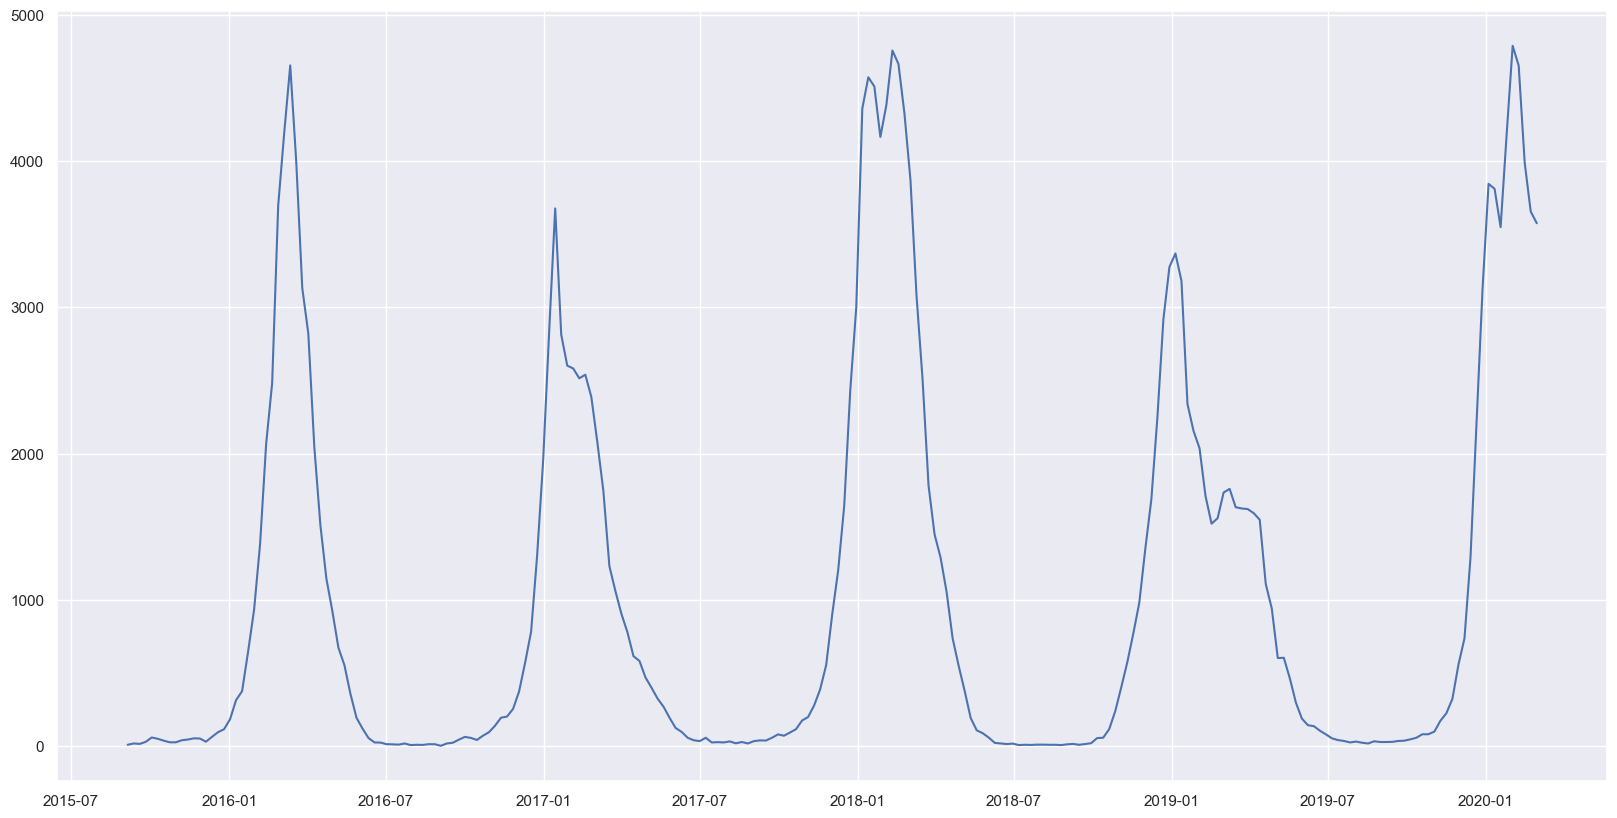

In [27]:
# plot
plt.plot(df_flu_pre_COVID.index, df_flu_pre_COVID.values)
plt.plot(df_flu_pre_COVID.index[-1], preds, color='red')

In [28]:
evaluate_model(test_y, predictions_test = preds, train = train_y, predictions_train = train_y)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [29]:
evaluate_model(test_y, predictions_test = preds)

Test MSE: 1782145.805
Test RMSE: 1334.97
Test MAE: 1334.97


# Random Forest - Pre-Covid - 1 week ahead

In [84]:
# Split to train and test
train_X, test_X = X[:-1], X[-1:]
train_y = df_flu_pre_COVID.iloc[:-1].values
test_y = df_flu_pre_COVID.iloc[-1:].values
print(f'Length of training set: {len(train_X)}')
print(f'Length of test set: {len(test_X)}')

Length of training set: 234
Length of test set: 1


In [85]:
train_y = train_y.ravel()

In [86]:
# instantiate the model
rf = RandomForestRegressor(random_state=seed_value)

# fit the model
rf.fit(train_X, train_y)

RandomForestRegressor(random_state=2022)

In [87]:
# predict on the same period
preds = rf.predict(test_X)
preds

array([3684.76])

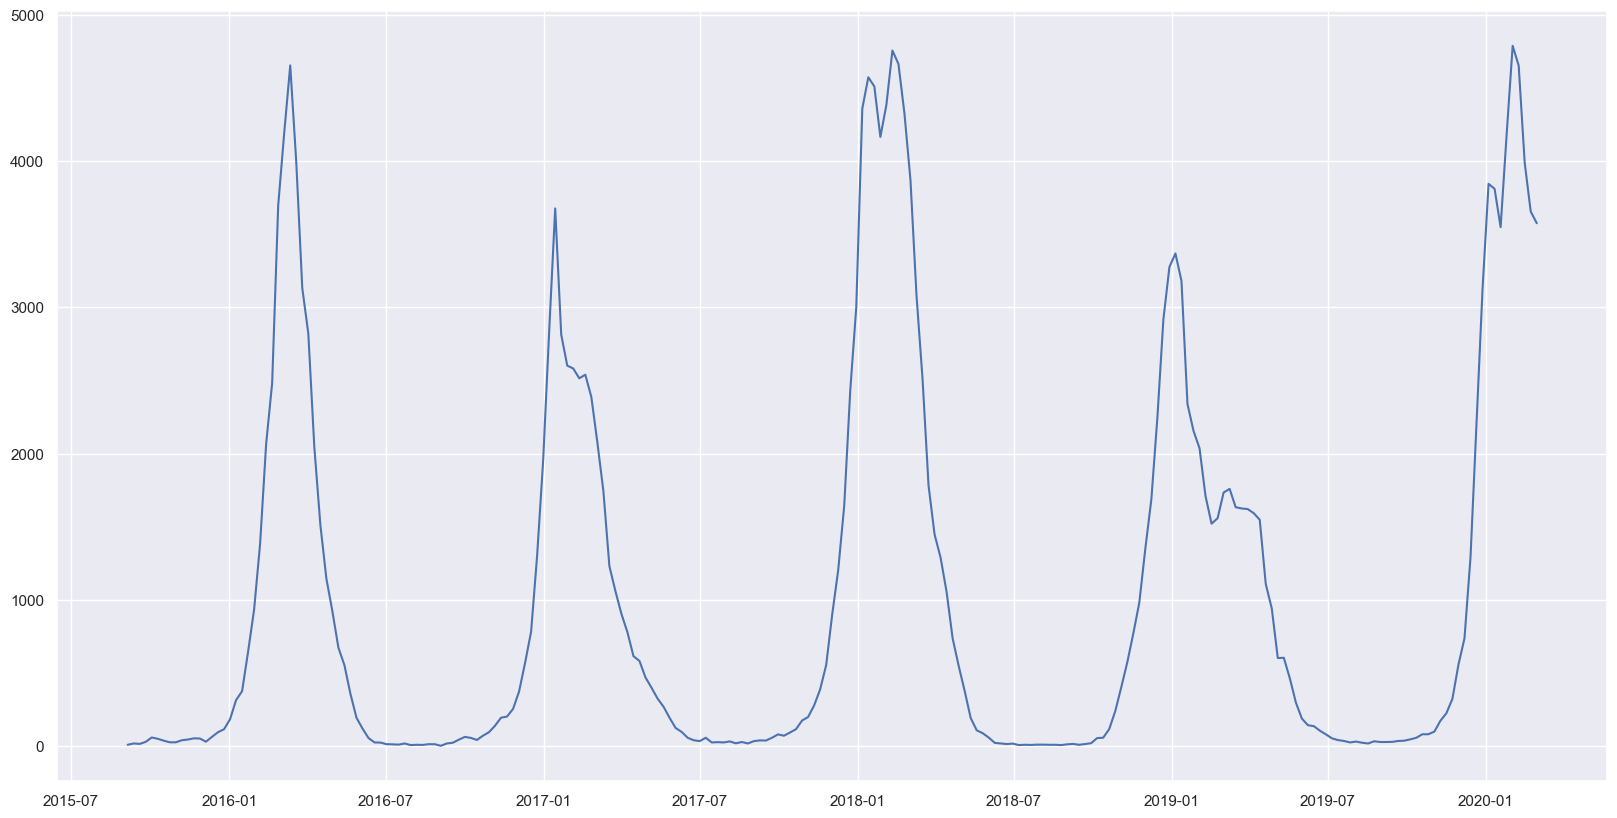

In [88]:
# plot
plt.plot(df_flu_pre_COVID.index, df_flu_pre_COVID.values)
plt.plot(df_flu_pre_COVID.index[-1], preds, color='red')

In [89]:
evaluate_model(test_y, predictions_test = preds, train = train_y, predictions_train = train_y)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [90]:
evaluate_model(test_y, predictions_test = preds)

Test MSE: 11828.738
Test RMSE: 108.76
Test MAE: 108.76


# Random Forest- Pre-COVID - 2 weeks ahead

In [92]:
# Split to train and test
train_X, test_X = X[:-2], X[-2:]
train_y = df_flu_pre_COVID.iloc[:-2].values
test_y = df_flu_pre_COVID.iloc[-2:].values
print(f'Length of training set: {len(train_X)}')
print(f'Length of test set: {len(test_X)}')

Length of training set: 233
Length of test set: 2


In [93]:
train_y = train_y.ravel()

In [94]:
train_y

array([9.000e+00, 1.800e+01, 1.500e+01, 2.900e+01, 5.900e+01, 5.000e+01,
       3.700e+01, 2.600e+01, 2.600e+01, 4.000e+01, 4.500e+01, 5.300e+01,
       5.200e+01, 3.000e+01, 6.300e+01, 9.500e+01, 1.150e+02, 1.830e+02,
       3.140e+02, 3.750e+02, 6.450e+02, 9.330e+02, 1.386e+03, 2.067e+03,
       2.484e+03, 3.697e+03, 4.193e+03, 4.655e+03, 3.994e+03, 3.132e+03,
       2.822e+03, 2.045e+03, 1.514e+03, 1.146e+03, 9.220e+02, 6.730e+02,
       5.530e+02, 3.570e+02, 1.940e+02, 1.200e+02, 5.500e+01, 2.500e+01,
       2.400e+01, 1.300e+01, 1.200e+01, 1.000e+01, 1.800e+01, 7.000e+00,
       9.000e+00, 8.000e+00, 1.300e+01, 1.300e+01, 2.000e+00, 1.800e+01,
       2.300e+01, 4.400e+01, 6.300e+01, 5.600e+01, 4.200e+01, 7.100e+01,
       9.500e+01, 1.390e+02, 1.940e+02, 2.020e+02, 2.540e+02, 3.730e+02,
       5.690e+02, 7.830e+02, 1.303e+03, 1.952e+03, 2.837e+03, 3.677e+03,
       2.814e+03, 2.602e+03, 2.582e+03, 2.515e+03, 2.540e+03, 2.388e+03,
       2.078e+03, 1.745e+03, 1.231e+03, 1.060e+03, 

In [95]:
# instantiate the model
rf = RandomForestRegressor(random_state=seed_value)

# fit the model
rf.fit(train_X, train_y)

RandomForestRegressor(random_state=2022)

In [96]:
# predict on the same period
preds = rf.predict(test_X)
preds

array([3952.92, 3901.58])

In [97]:
df_flu_pre_COVID.index[-2:]

DatetimeIndex(['2020-02-22', '2020-02-29'], dtype='datetime64[ns]', name='Week Ending', freq=None)

In [98]:
preds

array([3952.92, 3901.58])

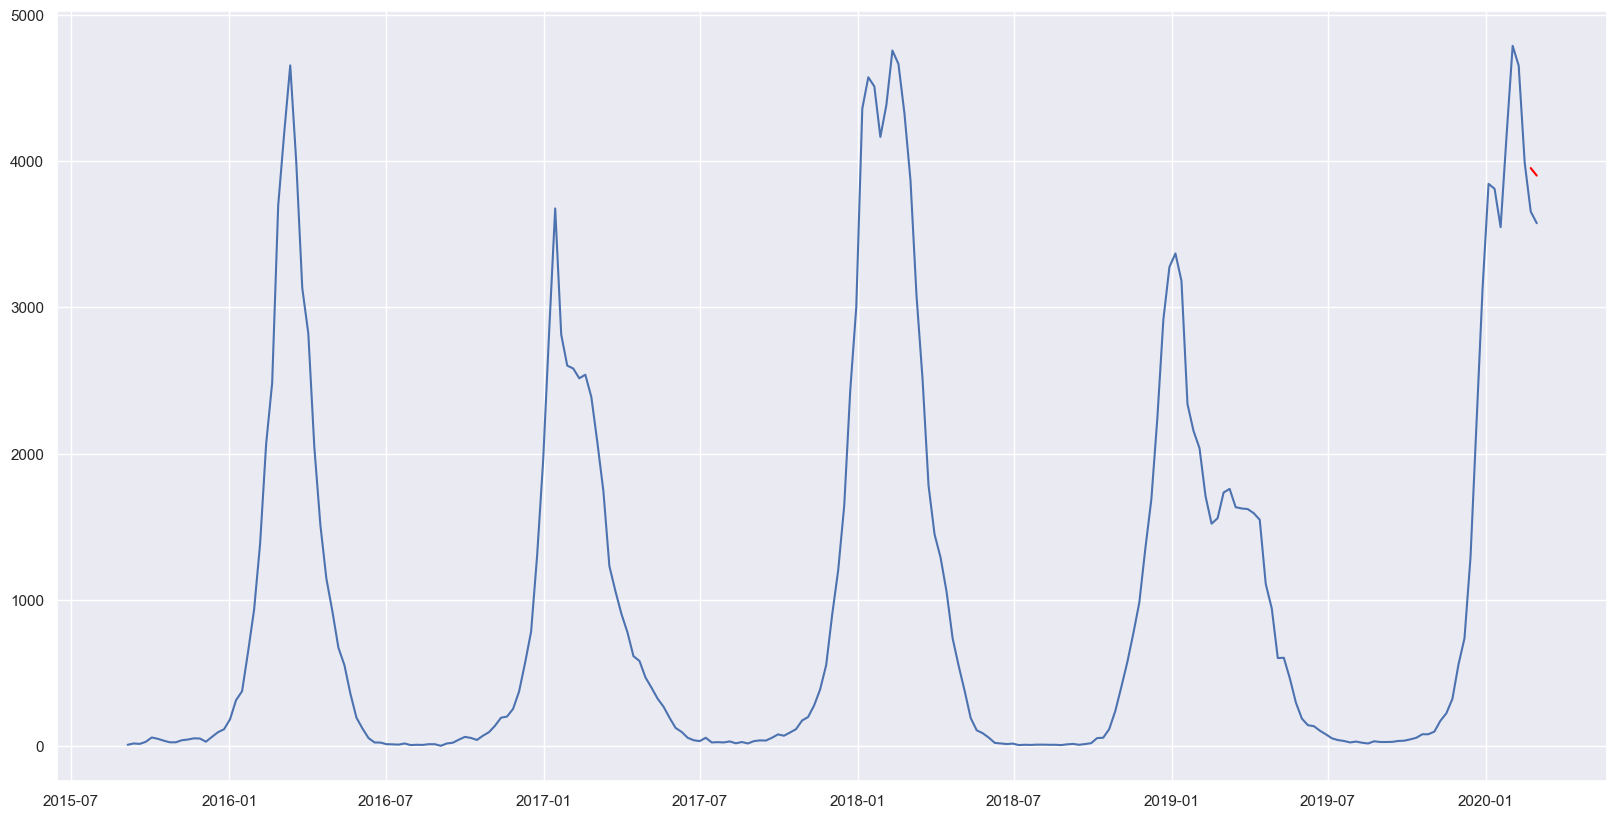

In [99]:
# plot
plt.plot(df_flu_pre_COVID.index, df_flu_pre_COVID.values)
plt.plot(df_flu_pre_COVID.index[-2:], preds, color='red')

In [100]:
evaluate_model(test_y, predictions_test = preds, train = train_y, predictions_train = train_y)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [101]:
evaluate_model(test_y, predictions_test = preds)

Test MSE: 97081.911
Test RMSE: 311.58
Test MAE: 311.25


# Random Forest- Pre-COVID - 3 weeks ahead

In [102]:
# Split to train and test
train_X, test_X = X[:-3], X[-3:]
train_y = df_flu_pre_COVID.iloc[:-3].values
test_y = df_flu_pre_COVID.iloc[-3:].values
print(f'Length of training set: {len(train_X)}')
print(f'Length of test set: {len(test_X)}')

Length of training set: 232
Length of test set: 3


In [103]:
train_y = train_y.ravel()

In [104]:
train_y

array([9.000e+00, 1.800e+01, 1.500e+01, 2.900e+01, 5.900e+01, 5.000e+01,
       3.700e+01, 2.600e+01, 2.600e+01, 4.000e+01, 4.500e+01, 5.300e+01,
       5.200e+01, 3.000e+01, 6.300e+01, 9.500e+01, 1.150e+02, 1.830e+02,
       3.140e+02, 3.750e+02, 6.450e+02, 9.330e+02, 1.386e+03, 2.067e+03,
       2.484e+03, 3.697e+03, 4.193e+03, 4.655e+03, 3.994e+03, 3.132e+03,
       2.822e+03, 2.045e+03, 1.514e+03, 1.146e+03, 9.220e+02, 6.730e+02,
       5.530e+02, 3.570e+02, 1.940e+02, 1.200e+02, 5.500e+01, 2.500e+01,
       2.400e+01, 1.300e+01, 1.200e+01, 1.000e+01, 1.800e+01, 7.000e+00,
       9.000e+00, 8.000e+00, 1.300e+01, 1.300e+01, 2.000e+00, 1.800e+01,
       2.300e+01, 4.400e+01, 6.300e+01, 5.600e+01, 4.200e+01, 7.100e+01,
       9.500e+01, 1.390e+02, 1.940e+02, 2.020e+02, 2.540e+02, 3.730e+02,
       5.690e+02, 7.830e+02, 1.303e+03, 1.952e+03, 2.837e+03, 3.677e+03,
       2.814e+03, 2.602e+03, 2.582e+03, 2.515e+03, 2.540e+03, 2.388e+03,
       2.078e+03, 1.745e+03, 1.231e+03, 1.060e+03, 

In [105]:
# instantiate the model
rf = RandomForestRegressor(random_state=seed_value)

# fit the model
rf.fit(train_X, train_y)

RandomForestRegressor(random_state=2022)

In [106]:
# predict on the same period
preds = rf.predict(test_X)
preds

array([4299.08, 4137.64, 4114.5 ])

In [107]:
df_flu_pre_COVID.index[-2:]

DatetimeIndex(['2020-02-22', '2020-02-29'], dtype='datetime64[ns]', name='Week Ending', freq=None)

In [108]:
preds

array([4299.08, 4137.64, 4114.5 ])

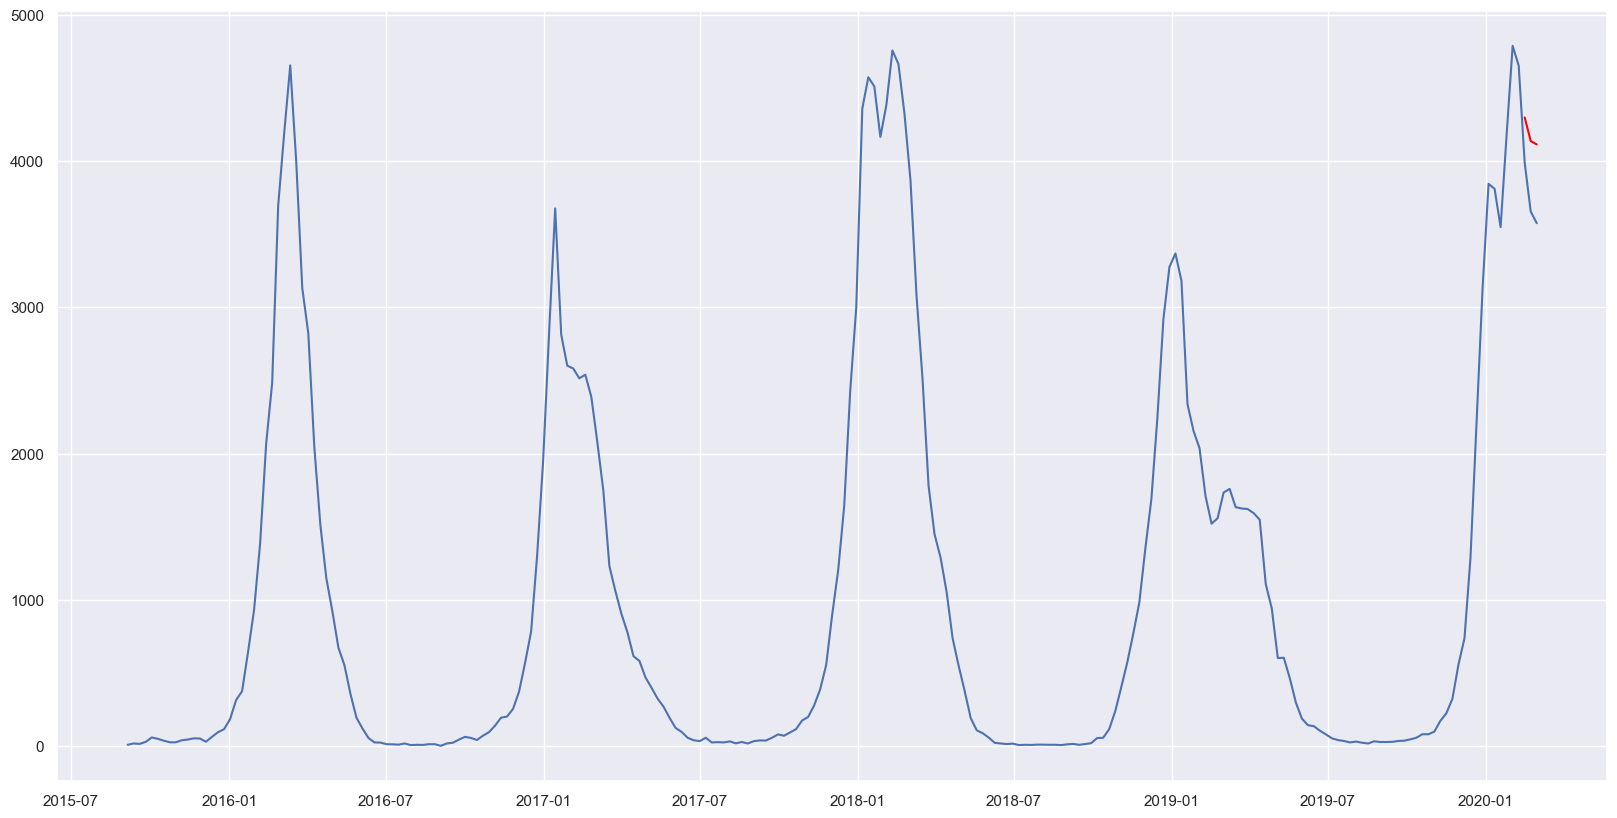

In [110]:
# plot
plt.plot(df_flu_pre_COVID.index, df_flu_pre_COVID.values)
plt.plot(df_flu_pre_COVID.index[-3:], preds, color='red')

In [ ]:
evaluate_model(test_y, predictions_test = preds, train = train_y, predictions_train = train_y)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [111]:
evaluate_model(test_y, predictions_test = preds)

Test MSE: 206036.315
Test RMSE: 453.912
Test MAE: 443.407


# Random Forest- Pre-COVID - 4 weeks ahead

In [112]:
# Split to train and test
train_X, test_X = X[:-4], X[-4:]
train_y = df_flu_pre_COVID.iloc[:-4].values
test_y = df_flu_pre_COVID.iloc[-4:].values
print(f'Length of training set: {len(train_X)}')
print(f'Length of test set: {len(test_X)}')

Length of training set: 231
Length of test set: 4


In [113]:
train_y = train_y.ravel()

In [114]:
train_y

array([9.000e+00, 1.800e+01, 1.500e+01, 2.900e+01, 5.900e+01, 5.000e+01,
       3.700e+01, 2.600e+01, 2.600e+01, 4.000e+01, 4.500e+01, 5.300e+01,
       5.200e+01, 3.000e+01, 6.300e+01, 9.500e+01, 1.150e+02, 1.830e+02,
       3.140e+02, 3.750e+02, 6.450e+02, 9.330e+02, 1.386e+03, 2.067e+03,
       2.484e+03, 3.697e+03, 4.193e+03, 4.655e+03, 3.994e+03, 3.132e+03,
       2.822e+03, 2.045e+03, 1.514e+03, 1.146e+03, 9.220e+02, 6.730e+02,
       5.530e+02, 3.570e+02, 1.940e+02, 1.200e+02, 5.500e+01, 2.500e+01,
       2.400e+01, 1.300e+01, 1.200e+01, 1.000e+01, 1.800e+01, 7.000e+00,
       9.000e+00, 8.000e+00, 1.300e+01, 1.300e+01, 2.000e+00, 1.800e+01,
       2.300e+01, 4.400e+01, 6.300e+01, 5.600e+01, 4.200e+01, 7.100e+01,
       9.500e+01, 1.390e+02, 1.940e+02, 2.020e+02, 2.540e+02, 3.730e+02,
       5.690e+02, 7.830e+02, 1.303e+03, 1.952e+03, 2.837e+03, 3.677e+03,
       2.814e+03, 2.602e+03, 2.582e+03, 2.515e+03, 2.540e+03, 2.388e+03,
       2.078e+03, 1.745e+03, 1.231e+03, 1.060e+03, 

In [115]:
# instantiate the model
rf = RandomForestRegressor(random_state=seed_value)

# fit the model
rf.fit(train_X, train_y)

RandomForestRegressor(random_state=2022)

In [116]:
# predict on the same period
preds = rf.predict(test_X)
preds

array([3984.05, 3833.82, 3702.31, 3620.18])

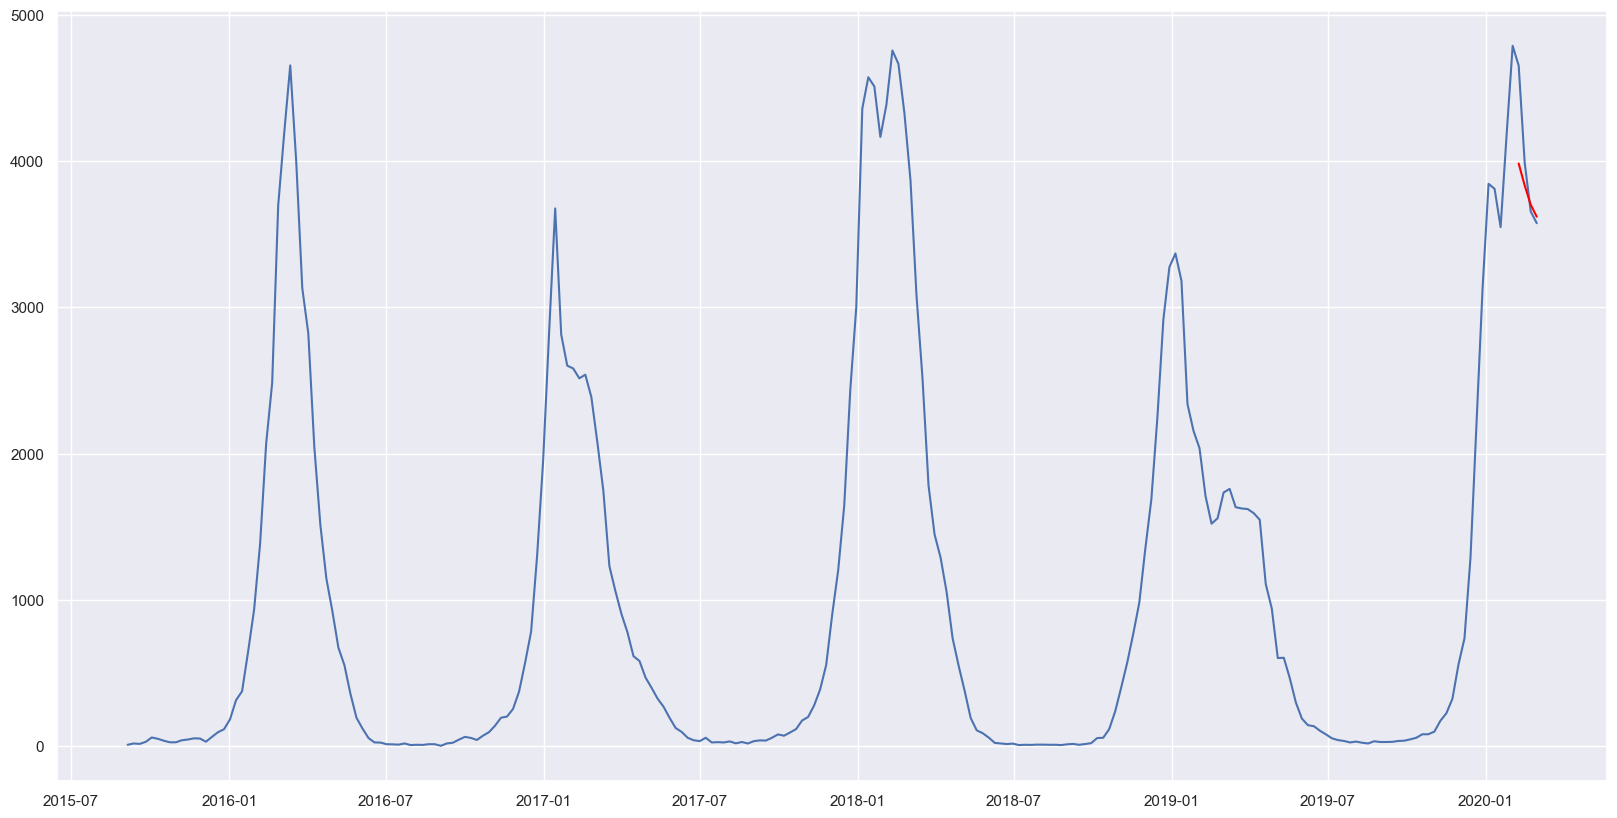

In [117]:
# plot
plt.plot(df_flu_pre_COVID.index, df_flu_pre_COVID.values)
plt.plot(df_flu_pre_COVID.index[-4:], preds, color='red')

In [118]:
evaluate_model(test_y, predictions_test = preds, train = train_y, predictions_train = train_y)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [119]:
evaluate_model(test_y, predictions_test = preds)

Test MSE: 119252.581
Test RMSE: 345.33
Test MAE: 228.905


# Random Forest (season) - Pre-COVID - 2 weeks ahead

In [ ]:
df_flu_pre_COVID = pickle.load(open(r"..\data\flu_cases\df_flu_pre_COVID_total.pkl", "rb" ))
df_flu_pre_COVID.head()
months = [x.month for x in df_flu_pre_COVID.index]
years = [x.year for x in df_flu_pre_COVID.index]
weeks = [x.weekofyear for x in df_flu_pre_COVID.index]
X = np.array([months, years, weeks]).T

In [ ]:
df_flu_pre_COVID.head()

,Total Cases
Week Ending,
2015-09-05,9.0
2015-09-12,18.0
2015-09-19,15.0
2015-09-26,29.0
2015-10-03,59.0


In [ ]:
X

array([[   9, 2015,   36],
       [   9, 2015,   37],
       [   9, 2015,   38],
       [   9, 2015,   39],
       [  10, 2015,   40],
       [  10, 2015,   41],
       [  10, 2015,   42],
       [  10, 2015,   43],
       [  10, 2015,   44],
       [  11, 2015,   45],
       [  11, 2015,   46],
       [  11, 2015,   47],
       [  11, 2015,   48],
       [  12, 2015,   49],
       [  12, 2015,   50],
       [  12, 2015,   51],
       [  12, 2015,   52],
       [   1, 2016,   53],
       [   1, 2016,    1],
       [   1, 2016,    2],
       [   1, 2016,    3],
       [   1, 2016,    4],
       [   2, 2016,    5],
       [   2, 2016,    6],
       [   2, 2016,    7],
       [   2, 2016,    8],
       [   3, 2016,    9],
       [   3, 2016,   10],
       [   3, 2016,   11],
       [   3, 2016,   12],
       [   4, 2016,   13],
       [   4, 2016,   14],
       [   4, 2016,   15],
       [   4, 2016,   16],
       [   4, 2016,   17],
       [   5, 2016,   18],
       [   5, 2016,   19],
 

In [ ]:
# Split to train and test
train_X, test_X = X[:-2], X[-2:]
train_y = df_flu_pre_COVID.iloc[:-2].values
test_y = df_flu_pre_COVID.iloc[-2:].values
print(f'Length of training set: {len(train_X)}')
print(f'Length of test set: {len(test_X)}')

Length of training set: 233
Length of test set: 2


In [ ]:
train_y = train_y.ravel()

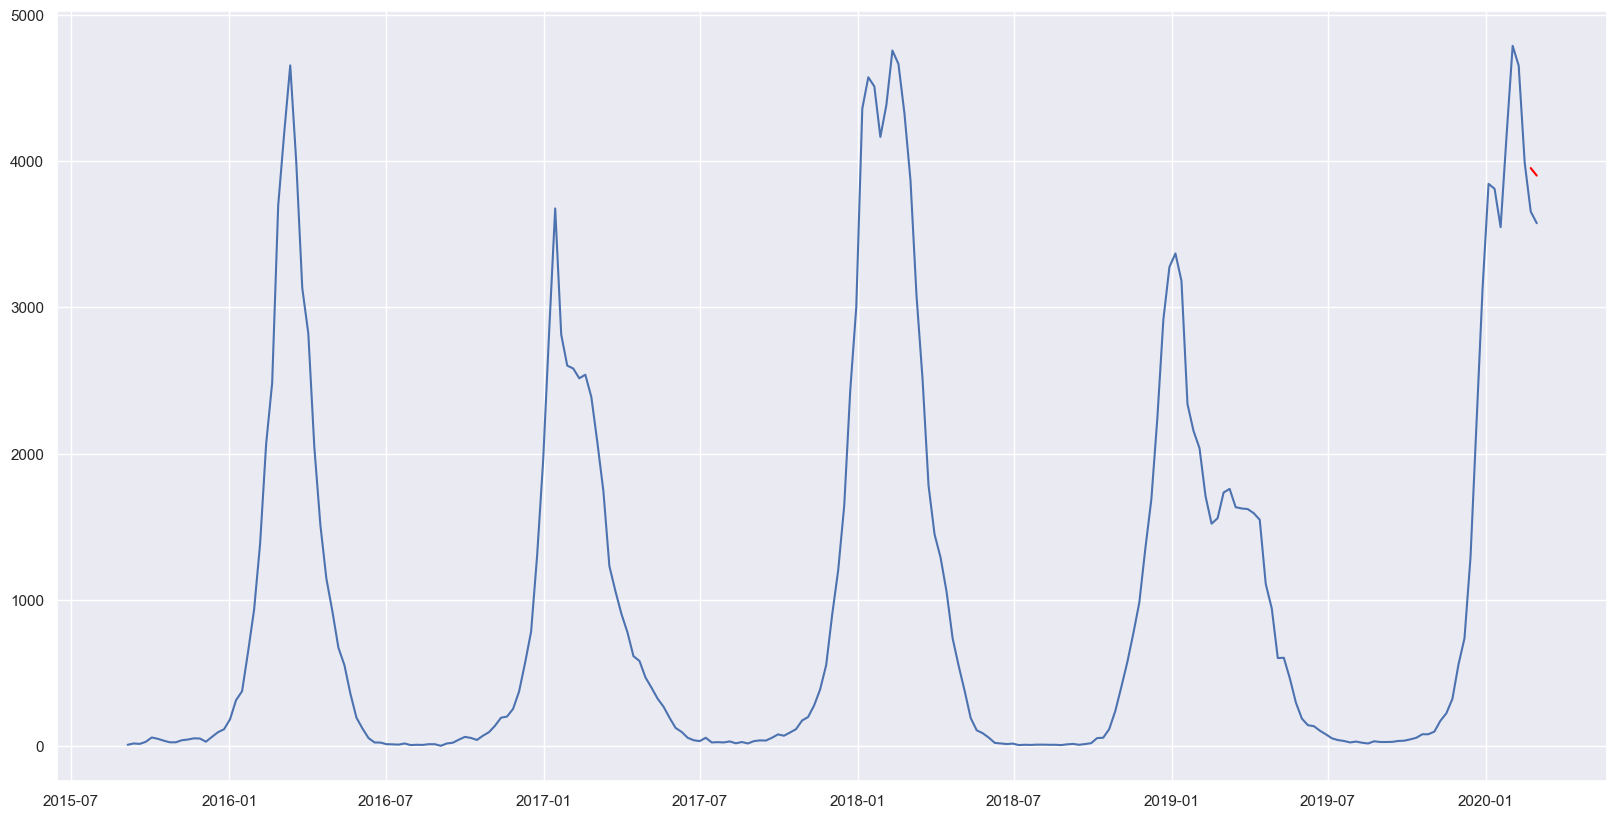

In [ ]:
seed_value = 2022

# instantiate the model
rf_season = RandomForestRegressor(random_state=seed_value)

# fit the model
rf_season.fit(train_X, train_y)

# predict on the same period
preds_season_test = rf_season.predict(test_X)
preds_season_train = rf_season.predict(train_X)

# plot
plt.plot(df_flu_pre_COVID.index, df_flu_pre_COVID.values)
plt.plot(df_flu_pre_COVID.index[-2:], preds_season_test, color='red')

In [ ]:
evaluate_model(test_y, predictions_test = preds_season_test, train=train_X, predictions_train=train_y)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
preds_season

array([3952.92, 3901.58])

In [ ]:
preds_symptoms

array([3906.93708599, 3906.93708599])

In [ ]:
test_y.reshape(1,-1)[0]

array([3656., 3576.])

#